In [2]:
import pandas as pd 
import requests
from dotenv import load_dotenv
from datetime import date
import streamlit as st
import calendar
import os

In [3]:
load_dotenv()
finance_key = os.getenv("new_finance_api_key")

In [4]:
import requests

url = "https://yahoo-finance127.p.rapidapi.com/price/eth-usd"

headers = {
	"x-rapidapi-key": finance_key,
	"x-rapidapi-host": "yahoo-finance127.p.rapidapi.com",
	"Content-Type": "application/json"
}

response = requests.get(url, headers=headers)



In [5]:
data=print(response.json())

{'symbol': 'ETH-USD', 'twoHundredDayAverageChangePercent': {'raw': 0.3270267, 'fmt': '32.70%'}, 'fiftyTwoWeekLowChangePercent': {'raw': 1.5070459, 'fmt': '150.70%'}, 'language': 'en-US', 'circulatingSupply': {'raw': 120146768, 'fmt': '120.147M', 'longFmt': '120,146,768'}, 'regularMarketDayRange': {'raw': '3738.1343 - 3827.27', 'fmt': '3,738.13 - 3,827.27'}, 'regularMarketDayHigh': {'raw': 3827.27, 'fmt': '3,827.27'}, 'twoHundredDayAverageChange': {'raw': 941.095, 'fmt': '941.09'}, 'fromCurrency': 'ETH', 'twoHundredDayAverage': {'raw': 2877.7314, 'fmt': '2,877.73'}, 'marketCap': {'raw': 458819665920, 'fmt': '458.82B', 'longFmt': '458,819,665,920'}, 'fiftyTwoWeekHighChange': {'raw': -273.45776, 'fmt': '-273.46'}, 'fiftyTwoWeekRange': {'raw': '1523.2375 - 4092.2842', 'fmt': '1,523.24 - 4,092.28'}, 'fiftyDayAverageChange': {'raw': 537.3987, 'fmt': '537.40'}, 'lastMarket': 'CoinMarketCap', 'averageDailyVolume3Month': {'raw': 17692816600, 'fmt': '17.693B', 'longFmt': '17,692,816,600'}, 'exch

In [6]:
record_data = response.json()


month = date.today().strftime("%m")
dated = date.today().strftime("%d")
year = date.today().strftime("%Y")
current_month = calendar.month_name[int(month)]

date_today = f"{current_month}"+" "+dated+", "+year
data = {
    "Date":date_today,
"Price" :record_data['regularMarketPrice']['fmt'],
"Open" :record_data['regularMarketOpen']['fmt'],
"High" : record_data['regularMarketDayHigh']['fmt'],
"Low" : record_data['regularMarketDayLow']['fmt'],
"Vol" : record_data['regularMarketVolume']['fmt'],
"Change %" : record_data['regularMarketChangePercent']['fmt']
}


In [7]:
new_data = pd.DataFrame([data])
df = pd.read_csv("../dataset/Ethereum Historical Data.csv")
df = new_data._append(df, ignore_index=True)
df.to_csv("../dataset/Ethereum Historical Data.csv", index=False)

In [8]:
data_type = {
    'Open': float,
    'High': float,
    'Low': float,
}


df = pd.read_csv("../dataset/Ethereum Historical Data.csv", dtype=data_type, thousands=',')

df['Change %'] = df['Change %'].str.replace('%', '').astype(float)
df

,Date,Price,Open,High,Low,Vol,Change %
0,"June 04, 2024",3818.83,3766.25,3827.27,3738.13,13.048B,1.20
1,"May 18, 2024",3114.98,3093.71,3122.03,3089.29,12.879B,2.30
2,"May 18, 2024",3114.05,3093.71,3122.03,3089.29,13.137B,2.30
3,"May 06, 2023",1969.82,1993.33,2013.10,1964.43,641.57K,-1.18
4,"May 05, 2023",1993.33,1877.06,1996.64,1875.66,589.05K,6.19
...,...,...,...,...,...,...,...
2612,"Mar 14, 2016",12.50,15.07,15.07,11.40,92.18K,-17.05
2613,"Mar 13, 2016",15.07,12.92,15.07,12.92,1.30K,16.64
2614,"Mar 12, 2016",12.92,11.95,13.45,11.95,0.83K,8.12
2615,"Mar 11, 2016",11.95,11.75,11.95,11.75,0.18K,1.70


In [9]:
pd.set_option('display.max_rows',2000)
df['Vol']

0       13.048B
1       12.879B
2       13.137B
3       641.57K
4       589.05K
         ...   
2612     92.18K
2613      1.30K
2614      0.83K
2615      0.18K
2616      0.00K
Name: Vol, Length: 2617, dtype: object

In [10]:
df['Vol'] = df['Vol'].str.replace('K','000')
df['Vol'] = df['Vol'].str.replace('M','000000')
df['Vol'] = df['Vol'].str.replace('B','000000000')
df['Vol'] = df['Vol'].replace('-', float('nan'))
df['Vol'] = df['Vol'].astype(float)
mean_value = df['Vol'].mean()
df['Vol'] = df['Vol'].fillna(mean_value)
# df['Vol'].isna().sum()
print(df)

               Date    Price     Open     High      Low      Vol  Change %
0     June 04, 2024  3818.83  3766.25  3827.27  3738.13   13.048      1.20
1      May 18, 2024  3114.98  3093.71  3122.03  3089.29   12.879      2.30
2      May 18, 2024  3114.05  3093.71  3122.03  3089.29   13.137      2.30
3      May 06, 2023  1969.82  1993.33  2013.10  1964.43  641.570     -1.18
4      May 05, 2023  1993.33  1877.06  1996.64  1875.66  589.050      6.19
...             ...      ...      ...      ...      ...      ...       ...
2612   Mar 14, 2016    12.50    15.07    15.07    11.40   92.180    -17.05
2613   Mar 13, 2016    15.07    12.92    15.07    12.92    1.300     16.64
2614   Mar 12, 2016    12.92    11.95    13.45    11.95    0.830      8.12
2615   Mar 11, 2016    11.95    11.75    11.95    11.75    0.180      1.70
2616   Mar 10, 2016    11.75    11.20    11.85    11.07    0.000      4.91

[2617 rows x 7 columns]


In [11]:
df['Vol'].isna().sum()
print(df)

               Date    Price     Open     High      Low      Vol  Change %
0     June 04, 2024  3818.83  3766.25  3827.27  3738.13   13.048      1.20
1      May 18, 2024  3114.98  3093.71  3122.03  3089.29   12.879      2.30
2      May 18, 2024  3114.05  3093.71  3122.03  3089.29   13.137      2.30
3      May 06, 2023  1969.82  1993.33  2013.10  1964.43  641.570     -1.18
4      May 05, 2023  1993.33  1877.06  1996.64  1875.66  589.050      6.19
...             ...      ...      ...      ...      ...      ...       ...
2612   Mar 14, 2016    12.50    15.07    15.07    11.40   92.180    -17.05
2613   Mar 13, 2016    15.07    12.92    15.07    12.92    1.300     16.64
2614   Mar 12, 2016    12.92    11.95    13.45    11.95    0.830      8.12
2615   Mar 11, 2016    11.95    11.75    11.95    11.75    0.180      1.70
2616   Mar 10, 2016    11.75    11.20    11.85    11.07    0.000      4.91

[2617 rows x 7 columns]


In [12]:
X=df.drop(columns=['Date','Change %'],axis=1)
Y = df['Change %']

In [13]:
unique_values = X['High'].unique()
print(unique_values)


[3827.27 3122.03 2013.1  ...   15.07   13.45   11.95]


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

clf=LinearRegression()
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
accuracy = mean_squared_error(Y_test,Y_pred).round(2)
print("Accuracy:", accuracy,"%")

Accuracy: 20.48 %


In [16]:
import matplotlib.pyplot as plt

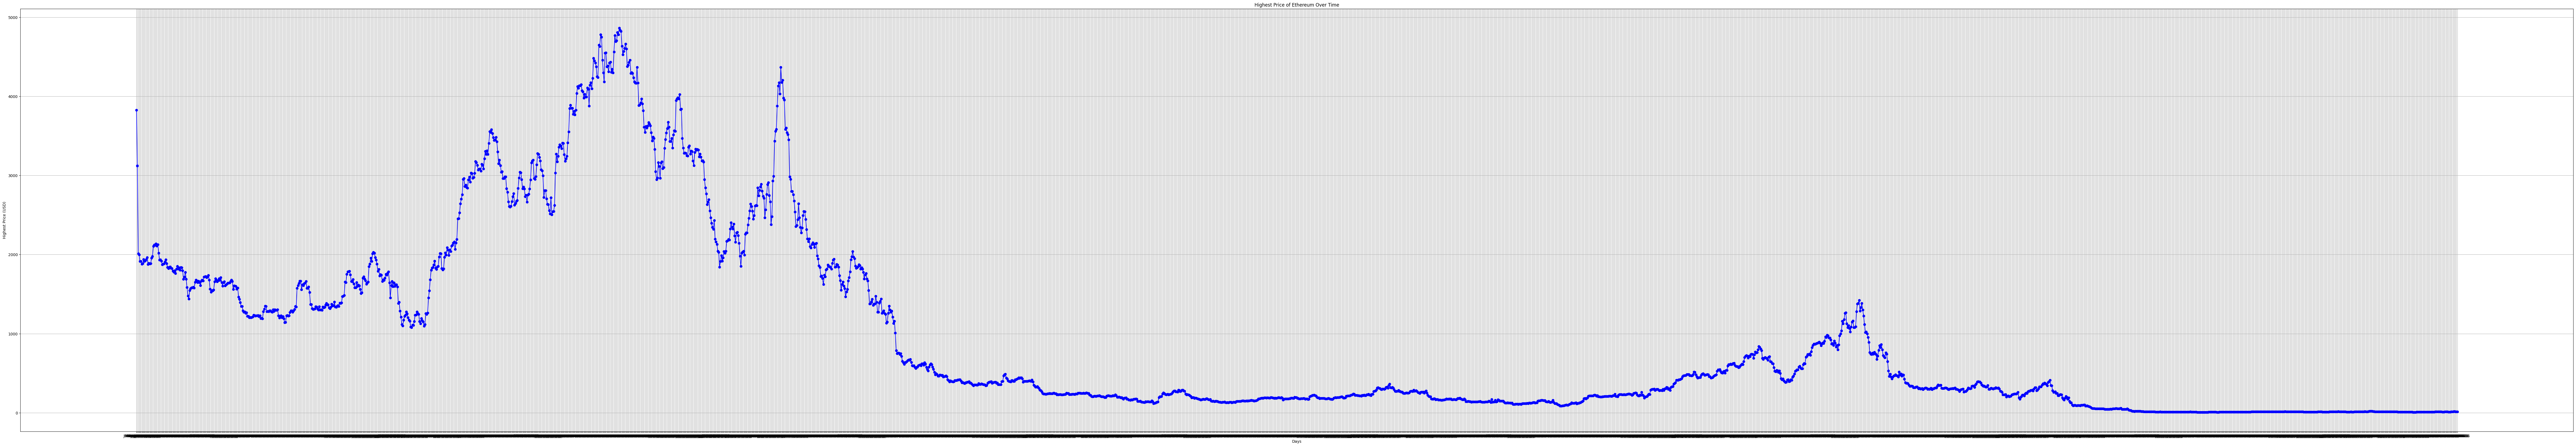

In [17]:
plt.figure(figsize=(120,20))
plt.plot(df['Date'],df['High'],color='blue',marker='o',linestyle='-')
plt.title('Highest Price of Ethereum Over Time')
plt.xlabel('Days')
plt.ylabel('Highest Price (USD)')
plt.grid(True)
plt.show()

In [18]:
# Assuming you have already loaded the data and split it into X_train, X_test, Y_train, Y_test
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
import xgboost as xgb
import numpy as np
# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

# Make predictions with the Random Forest model
rf_predictions = rf_model.predict(X_test)

# Create and train the XGBoost model
xgb_regressor = xgb.XGBRegressor(n_estimators=150, learning_rate=0.2, max_depth=5)
xgb_regressor.fit(X_train, Y_train)

# Make predictions with the XGBoost model
xgb_predictions = xgb_regressor.predict(X_test)

# Combine the predictions from both models
combined_predictions = rf_predictions + xgb_predictions

# Calculate mean squared error
mae=mean_absolute_error(Y_test,combined_predictions)
r2=r2_score(Y_test,combined_predictions)
mse = mean_squared_error(Y_test, combined_predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 10.962570210677182


In [19]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras import regularizers

scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.01,l2=0.01)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))


model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error')

history=model.fit(scaled_X_train, Y_train, epochs=50, batch_size=32, validation_split=0.1)

loss = model.evaluate(scaled_X_test, Y_test)
print(f'Test Loss: {loss}')

predictions = model.predict(scaled_X_test)


Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 27.8380 - val_loss: 41.1793
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25.5230 - val_loss: 41.0583
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26.2184 - val_loss: 40.9223
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30.5836 - val_loss: 41.0432
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26.7896 - val_loss: 40.9127
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26.5963 - val_loss: 41.0989
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28.7394 - val_loss: 41.0216
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28.4437 - val_loss: 41.1576
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25.7188 - val_loss: 41.1259
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27.5192 - val_loss: 40.9689
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28.1293 - val_loss: 40.7611
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step -

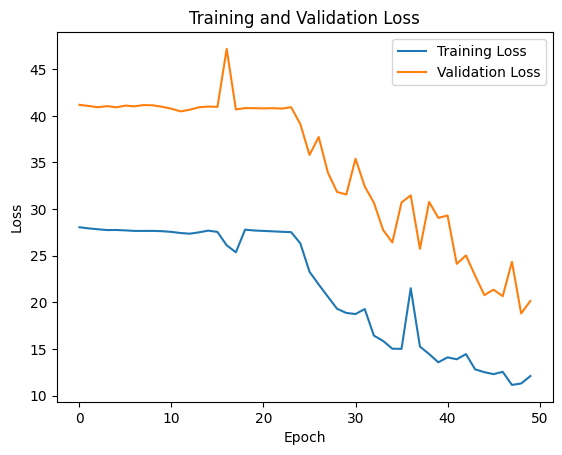

In [20]:
import matplotlib.pyplot as plt

# Train the model
# history = model.fit(scaled_X_train, Y_train, epochs=50, batch_size=32, validation_split=0.1)

# Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [21]:
print(min(history.history["loss"]))

11.144003868103027


In [22]:
from pathlib import Path

In [23]:

# Save the model architecture to JSON format
model_json = model.to_json()
with open(str(Path("model-data.json")), "w") as json_file:
    json_file.write(model_json)



# import joblib
# joblib.dump(scaler, "scaler.pkl")



In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,573 (162.40 KB)

 Trainable params: 13,857 (54.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 27,716 (108.27 KB)

In [25]:
# from tensorflow.keras.models import model_from_json

# # Load the model architecture from JSON format
# with open(str(Path("./model-data.json", "r"))) as json_file:
#     loaded_model_json = json_file.read()
# loaded_model = model_from_json(loaded_model_json)
# import joblib

# # Load the scaler object
# scaler = joblib.load("scaler.pkl")
# print(scaler)

In [31]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, InputLayer
import numpy as np

# Assuming scaled_X_train and Y_train are properly defined

# Assuming scaled_X_test and Y_test are properly defined

# Check the shape of scaled_X_train
print(f'scaled_X_train shape: {scaled_X_train.shape}')

# Reshape scaled_X_train if it is 2D
if len(scaled_X_train.shape) == 2:
    scaled_X_train = np.reshape(scaled_X_train, (scaled_X_train.shape[0], 1, scaled_X_train.shape[1]))

# Check the shape of scaled_X_test
print(f'scaled_X_test shape: {scaled_X_test.shape}')

# Reshape scaled_X_test if it is 2D
if len(scaled_X_test.shape) == 2:
    scaled_X_test = np.reshape(scaled_X_test, (scaled_X_test.shape[0], 1, scaled_X_test.shape[1]))

# Define the input shape based on the shape of scaled_X_train
model = Sequential()
model.add(InputLayer(input_shape=(scaled_X_train.shape[1], scaled_X_train.shape[2])))
model.add(GRU(50, return_sequences=True))
model.add(GRU(50))  # Added another GRU layer without return_sequences
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(scaled_X_train, Y_train, epochs=50, batch_size=32, validation_split=0.1)

loss = model.evaluate(scaled_X_test, Y_test)
print(f'Test Loss: {loss}')

predictions = model.predict(scaled_X_test)
print(predictions)


scaled_X_train shape: (1831, 5)
scaled_X_test shape: (786, 5)


e:\assignment1 theory DB'\Stock Price Prediction\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 29.0494 - val_loss: 40.9620
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28.8221 - val_loss: 40.9078
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28.1245 - val_loss: 40.7441
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27.0781 - val_loss: 40.7930
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26.2719 - val_loss: 40.6913
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26.8445 - val_loss: 40.9181
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25.4292 - val_loss: 40.6077
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28.1036 - val_loss: 40.8622
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27.7092 - val_loss: 41.0019
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27.0747 - val_loss: 40.8636
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27.8452 - val_loss: 40.4964
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

In [32]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                     │ (None, 1, 50)          │         8,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,979 (324.14 KB)

 Trainable params: 27,659 (108.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 55,320 (216.10 KB)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 10.8489 - val_loss: 20.5230
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 12.5714 - val_loss: 20.7366
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.4990 - val_loss: 22.5346
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 10.2275 - val_loss: 19.6226
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.0462 - val_loss: 25.7329
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.0314 - val_loss: 19.1210
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.8217 - val_loss: 18.5004
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.5802 - val_loss: 19.1033
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.7516 - val_loss: 18.2047
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.7841 - val_loss: 17.9569
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.1462 - val_loss: 27.5944
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - lo

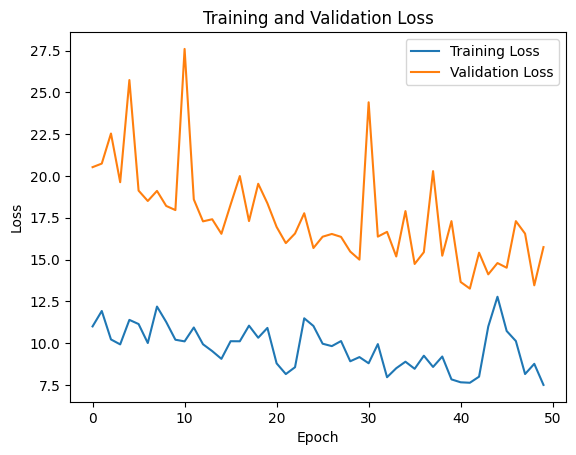

In [33]:
import matplotlib.pyplot as plt

# Train the model
history = model.fit(scaled_X_train, Y_train, epochs=50, batch_size=32, validation_split=0.1)

# Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [34]:
print(min(history.history["loss"]))

7.4994072914123535


In [ ]:
from tensorflow.keras.layers import Dense, LSTM
model = Sequential()
model.add(Input(shape=(10,1)))
model.add(Dense(10))  # Output layer without activation for regression
model.add(LSTM(50,return_sequences=True))  # 50 units in the LSTM layer
model.add(LSTM(50))  # 50 units in the LSTM layer
model.add(Dense(10))
 # 50 units in the LSTM layer
model.add(Dense(10))  # Output layer without activation for regression

# model.add(LSTM(50))  # 50 units in the LSTM layer
model.add(Dense(1))  # Output layer without activation for regression

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')  # Using mean squared error loss for regression

# Train the model


model.fit(scaled_X_train, Y_train, epochs=50, batch_size=32, validation_split=0.1)

loss = model.evaluate(scaled_X_test, Y_test)
print(f'Test Loss: {loss}')

predictions = model.predict(scaled_X_test)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - loss: 29.9679 - val_loss: 36.9418
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 28.8291 - val_loss: 36.9210
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 26.6714 - val_loss: 36.8576
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 29.3463 - val_loss: 36.9221
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 27.1648 - val_loss: 36.9969
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 28.3948 - val_loss: 36.9735
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 29.6592 - val_loss: 36.9511
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 29.4000 - val_loss: 36.9470
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 27.9259 - val_loss: 37.0553
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 27.3391 - val_loss: 36.8816
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 26.4577 - val_loss: 37.0458
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s

In [35]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                     │ (None, 1, 50)          │         8,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,979 (324.14 KB)

 Trainable params: 27,659 (108.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 55,320 (216.10 KB)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.9218 - val_loss: 5.1964
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.2155 - val_loss: 4.1014
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.6214 - val_loss: 2.9522
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.2891 - val_loss: 4.1315
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.3467 - val_loss: 3.3363
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.4276 - val_loss: 3.5834
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.3296 - val_loss: 2.8396
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.3321 - val_loss: 6.9922
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.3583 - val_loss: 5.2309
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.1036 - val_loss: 3.4969
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.0922 - val_loss: 4.4340
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.5310

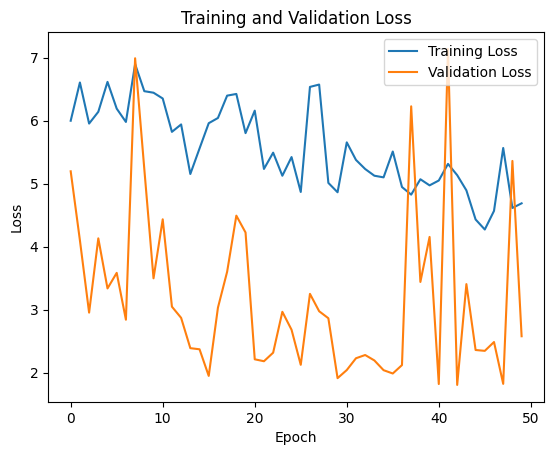

In [ ]:
import matplotlib.pyplot as plt

# Train the model
history = model.fit(scaled_X_train, Y_train, epochs=50, batch_size=32, validation_split=0.1)

# Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:

print(min(history.history["loss"]))


4.27216911315918
